In [1]:
fname = 'neko.txt.mecab'
morphemes_list = []
morphemes = []

with open(fname) as file:
    for line in file:
        line = line.rstrip('\n')
        if line == 'EOS':
            break
        morpheme = line.split('\t')
        surface = morpheme[0]
        base = morpheme[1].split(',')[6]
        pos = morpheme[1].split(',')[0]
        pos1 = morpheme[1].split(',')[1]
        morpheme_dic = {'surface':surface, 'base':base, 'pos':pos, 'pos1':pos1}
        morphemes.append(morpheme_dic)
        if pos1 == '句点':
            morphemes_list.append(morphemes)
            morphemes = []

In [2]:
from collections import Counter

words = []

for morphemes in morphemes_list:
    for morpheme in morphemes:
        if morpheme['surface'] == '猫':
            flag = 1
    if flag == 1:
        for morpheme in morphemes:
            words.append(morpheme['surface'])
    flag = 0
word_counts = Counter(words).most_common(11)

for word_count in word_counts:
    if word_count[0] == '猫':
        neko_count = word_count
word_counts.remove(neko_count)

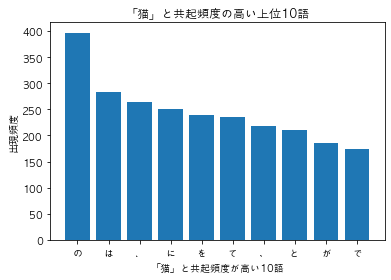

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

labels = []
x = range(0, 10)
y = []

for word_count in word_counts:
    labels.append(word_count[0])
    y.append(word_count[1])
    
plt.bar(x, y, tick_label=labels)
plt.title('「猫」と共起頻度の高い上位10語')
plt.xlabel('「猫」と共起頻度が高い10語')
plt.ylabel('出現頻度')
plt.show()